In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ExoplanetAnalysisData.csv to ExoplanetAnalysisData.csv


In [ ]:
import csv

rows = []
with open("ExoplanetAnalysisData.csv","r") as f:
  csvreader = csv.reader(f)
  for row in csvreader:
    rows.append(row)

headers = rows[0]
planet_data = rows[1:]

print(headers)
print(planet_data[3:6])

headers[0] = "row_num"

solar_system_planet_count = {}

for planets in planet_data:
  if solar_system_planet_count.get(planets[11]):
    solar_system_planet_count[planets[11]] += 1
  else:
    solar_system_planet_count[planets[11]] = 1

max_solar_system = max(solar_system_planet_count,key=solar_system_planet_count.get)
print("Solar System {} has maximum planets {} out of all other solar systems we have discovered".format(max_solar_system,solar_system_planet_count[max_solar_system]))

['', 'name', 'light_years_from_earth', 'planet_mass', 'stellar_magnitude', 'discovery_date', 'planet_type', 'planet_radius', 'orbital_radius', 'orbital_period', 'eccentricity', 'solar_system_name', 'planet_discovery_method', 'planet_orbital_inclination', 'planet_density', 'right_ascension', 'declination', 'host_temperature', 'host_mass', 'host_radius']
[['3', '14 Herculis b', '59.0', '4.66 Jupiters', '6.61', '2002', 'Gas Giant', '1.15 x Jupiter', '2.93 AU', '4.9 years', '0.37', '14 Her', 'Radial Velocity', '', '', '16h10m24.31s', '+43d49m03.5s', '5338.0', '0.9', '0.93'], ['4', '16 Cygni B b', '69.0', '1.78 Jupiters', '6.25', '1996', 'Gas Giant', '1.2 x Jupiter', '1.66 AU', '2.2 years', '0.68', '16 Cyg B', 'Radial Velocity', '', '', '19h41m51.97s', '+50d31m03.1s', '5750.0', '1.08', '1.13'], ['5', '18 Delphini b', '249.0', '10.3 Jupiters', '5.506', '2008', 'Gas Giant', '1.11 x Jupiter', '2.6 AU', '2.7 years', '0.08', '18 Del', 'Radial Velocity', '', '', '20h58m25.94s', '+10d50m21.4s', '4

In [ ]:
temp_planet_data_row = list(planet_data)

for planets in temp_planet_data_row:
  planet_mass = planets[3]
  if planet_mass.lower() == "unknown":
    planet_data.remove(planets)
    continue
  else:
    planet_mass_value = planet_mass.split(" ")[0]
    planet_mass_reference = planet_mass.split(" ")[1]
    if planet_mass_reference == "Jupiters":
      planet_mass_value = float(planet_mass_value)*317.8
    planets[3] = planet_mass_value

  planet_radius = planets[7]
  if planet_radius.lower() == "unknown":
    planet_data.remove(planets)
    continue
  else:
    planet_radius_value = planet_radius.split(" ")[0]
    planet_radius_ref = planet_radius.split(" ")[2]
    if planet_radius_ref == "Jupiter":
      planet_radius_value = float(planet_radius_value)*11.2
    planets[7] = planet_radius_value

print(len(planet_data))



4251


In [ ]:
KOI_351_planets = []
for planets in planet_data:
  if max_solar_system == planets[11]:
    KOI_351_planets.append(planets)

print(len(KOI_351_planets))
print(KOI_351_planets)

7
[['3665', 'Kepler-903 b', '2704.0', '4.7', '14.615', '2016', 'Super Earth', '2.01', 'Unknown', '10.4 days', '0.0', 'KOI-351', 'Transit', '89.2', '', '18h57m44.04s', '+49d18m18.6s', '6080.0', '1.2', '1.2'], ['3824', 'KOI-142 b', '1106.0', '9.5', '13.11', '2013', 'Neptune-like', 3.4383999999999997, 'Unknown', '10.9 days', '0.06', 'KOI-351', 'Transit', '89.4', '', '18h57m44.04s', '+49d18m18.6s', '6080.0', '1.2', '1.2'], ['3825', 'KOI-142 c', '1106.0', 214.1972, '13.11', '2013', 'Gas Giant', 14.0, '0.15525 AU', '22.3 days', '0.06', 'KOI-351', 'Transit', '89.68', '', '18h57m44.04s', '+49d18m18.6s', '6080.0', '1.2', '1.2'], ['3826', 'KOI-1599.01', '3813.0', '4.6', '14.854000000000001', '2019', 'Super Earth', '1.9', '0.14728 AU', '20.4 days', '0.01', 'KOI-351', 'Transit', '89.71', '', '18h57m44.04s', '+49d18m18.6s', '6080.0', '1.2', '1.2'], ['3827', 'KOI-1599.02', '3813.0', '9', '14.854000000000001', '2019', 'Super Earth', '1.9', '0.112293 AU', '13.6 days', '0.01', 'KOI-351', 'Transit', '89

In [ ]:
import plotly.express as px

KOI_351_masses = []
KOI_351_names = []

for planets in KOI_351_planets:
  KOI_351_masses.append(planets[3])
  KOI_351_names.append(planets[1])

KOI_351_masses.append(1)
KOI_351_names.append("Earth")

fig = px.bar(x=KOI_351_names,y=KOI_351_masses)
fig.show()

In [ ]:
temp_planet_data = list(planet_data)

for planets in temp_planet_data:
  if planets[1].lower() == "11 Ursae Minoris b":
    planet_data.remove(planets)

planet_mass = []
planet_radius = []
planet_name = []

for planets in planet_data:
  planet_mass.append(planets[3])
  planet_radius.append(planets[7])
  planet_name.append(planets[1])

planet_gravity = []

for index,name in enumerate(planet_name):
  gravity = (float(planet_mass[index])*5.972e+24)/(float(planet_radius[index])*float(planet_radius[index])*6371000*6371000)*6.674e-11
  planet_gravity.append(gravity)

fig = px.scatter(x=planet_radius,y=planet_mass,size=planet_gravity,hover_data=[planet_name])
fig.show()

In [ ]:
lowest_gravity_planets = []

for index,gravity in enumerate(planet_gravity):
  if gravity<10:
    lowest_gravity_planets.append(planet_data[index])

print(len(lowest_gravity_planets))

1012


In [ ]:
lowest_gravity_planets = []

for index,gravity in enumerate(planet_gravity):
  if gravity<100:
    lowest_gravity_planets.append(planet_data[index])

print(len(lowest_gravity_planets))
print(headers)

3951
['row_num', 'name', 'light_years_from_earth', 'planet_mass', 'stellar_magnitude', 'discovery_date', 'planet_type', 'planet_radius', 'orbital_radius', 'orbital_period', 'eccentricity', 'solar_system_name', 'planet_discovery_method', 'planet_orbital_inclination', 'planet_density', 'right_ascension', 'declination', 'host_temperature', 'host_mass', 'host_radius']


In [ ]:
planet_type_values = []

for values in planet_data:
  planet_type_values.append(values[6])

print(planet_type_values)
# set prints unique values
print(set(planet_type_values))
# lists converts to list
print(list(set(planet_type_values)))

['Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Super Earth', 'Gas Giant', 'Neptune-like', 'Neptune-like', 'Neptune-like', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Neptune-like', 'Gas Giant', 'Neptune-like', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Neptune-like', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Neptune-like', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', 'Gas Giant', '

In [ ]:
masses = []
radius = []

for values in lowest_gravity_planets:
  masses.append(values[3])
  radius.append(values[7])

fig = px.scatter(x=radius,y=masses)
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



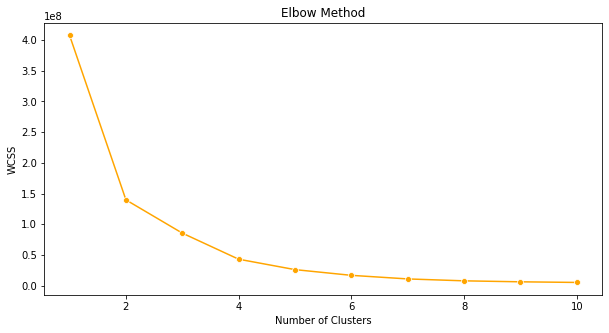

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

X = []

for index,mass in enumerate(masses):
  temp_list = [radius[index],mass]
  X.append(temp_list)

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
sns.lineplot(range(1,11),wcss,marker='o',color='orange')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.show()

In [ ]:
planet_mass = []
planet_radius = []
planet_type = []

for values in lowest_gravity_planets:
  planet_mass.append(values[3])
  planet_radius.append(values[7])
  planet_type.append(values[6])

fig = px.scatter(x=planet_radius,y=planet_mass,color=planet_type)
fig.show()

In [ ]:
suitable_planets = []

for values in lowest_gravity_planets:
  if values[6].lower() == "terrestrial" or values[6].lower() == "super earth":
    suitable_planets.append(values)

print(suitable_planets)
print(len(suitable_planets))
print(headers)
print(planet_data[1])

[['29', '55 Cancri e', '41.0', '8.08', '5.96', '2004', 'Super Earth', '1.91', '0.01544 AU', '0.7 days', '0.03', '55 Cnc', 'Radial Velocity', '83.3', '6.4', '08h52m35.81s', '+28d19m50.9s', '5196.0', '0.91', '0.94'], ['102', 'CoRoT-7 b', '524.0', '3.1783', '11.668', '2009', 'Super Earth', '1.681', '0.017016 AU', '0.9 days', '0.0', 'CoRoT-7', 'Transit', '80.1', '', '06h43m49.47s', '-01d03m46.9s', '5275.0', '0.82', '0.83'], ['113', 'DMPP-1 d', '202.0', '3.35', '7.981', '2019', 'Super Earth', '1.65', '0.0422 AU', '2.9 days', '< 0.07', 'DMPP-1', 'Radial Velocity', '', '', '05h47m06.27s', '-10d37m48.8s', '6196.0', '1.21', '1.26'], ['114', 'DMPP-1 e', '202.0', '4.13', '7.981', '2019', 'Super Earth', '1.86', '0.0651 AU', '5.5 days', '< 0.07', 'DMPP-1', 'Radial Velocity', '', '', '05h47m06.27s', '-10d37m48.8s', '6196.0', '1.21', '1.26'], ['116', 'DMPP-3 A b', '160.0', '2.58', '9.066', '2019', 'Super Earth', '1.41', '0.0662 AU', '6.7 days', '0.14', 'DMPP-3 A', 'Radial Velocity', '', '', '06h06m29

In [ ]:
temp_suitable_planets = list(suitable_planets)

for planets in temp_suitable_planets:
  if planets[8].lower() == "unknown":
    suitable_planets.remove(planets)

for planets in suitable_planets:
  if planets[9].split(" ")[1].lower() == 'days':
    planets[9] = float(planets[9].split(" ")[0])
  else:
    planets[9] = float(planets[9].split(" ")[0])*365
  planets[8] = float(planets[8].split(" ")[0])

orbital_radius = []
orbital_period = []

for planets in suitable_planets:
  orbital_radius.append(planets[8])
  orbital_period.append(planets[9])

fig = px.scatter(x=orbital_radius, y=orbital_period)
fig.show()

In [ ]:
goldilock_planets = list(suitable_planets)
temp_goldilock_planets = list(suitable_planets)

for planets in temp_goldilock_planets:
  if planets[8] < 0.38 or planets[8] > 2:
    goldilock_planets.remove(planets)

print(len(suitable_planets))
print(len(goldilock_planets))

696
25


In [ ]:
planet_speed = []

for planets in suitable_planets:
  distance = 2*3.14*(planets[8]*1.496e+9)
  time = planets[9]*86400
  speed = distance/time
  planet_speed.append(speed)

speed_supporting_planets = list(suitable_planets)
temp_speed_supporting_planets = list(suitable_planets)

for index,planets in enumerate(temp_speed_supporting_planets):
  if planet_speed[index] > 200:
    speed_supporting_planets.remove(planets)

print(len(speed_supporting_planets))

8


In [ ]:
habitable_planets = []

for planets in speed_supporting_planets:
  if planets in goldilock_planets:
    habitable_planets.append(planets)

print(len(habitable_planets))

6


In [ ]:
final_dict = {}

for index,planets in enumerate(planet_data):
  features_list = []
  gravity = (float(planets[3])*5.972e+24)/(float(planets[7])*float(planets[7])*6371000*6371000)*6.674e-11
  try:
    if gravity<100:
      features_list.append("gravity")
  except:
    pass

  try:
    if planets[6].lower()=="terrestrial" or planets[6].lower()=="super earth":
      features_list.append("planet_type")
  except:
    pass

  try:
    distance = 2*3.14*(planets[8]*1.496e+9)
    time = planets[9]*86400
    speed = distance/time
    if speed<200:
      features_list.append("speed")
  except:
    pass

  try:
    if planets[8]>0.38 or planets[8]<2:
      features_list.append("goldilock")
  except:
    pass

  final_dict[index] = features_list

print(final_dict)

{0: [], 1: [], 2: ['gravity'], 3: ['gravity'], 4: ['gravity'], 5: [], 6: ['gravity'], 7: ['gravity'], 8: ['gravity'], 9: ['gravity'], 10: [], 11: [], 12: [], 13: [], 14: ['gravity'], 15: ['gravity'], 16: [], 17: [], 18: [], 19: ['gravity'], 20: ['gravity'], 21: ['gravity'], 22: ['gravity'], 23: [], 24: ['gravity'], 25: ['gravity'], 26: ['gravity'], 27: ['gravity'], 28: ['gravity'], 29: ['gravity', 'planet_type', 'goldilock'], 30: ['gravity'], 31: ['gravity'], 32: ['gravity'], 33: ['gravity'], 34: ['gravity'], 35: [], 36: ['gravity'], 37: ['gravity'], 38: ['gravity'], 39: [], 40: ['gravity'], 41: ['gravity'], 42: [], 43: ['gravity'], 44: [], 45: ['gravity'], 46: [], 47: ['gravity'], 48: ['gravity'], 49: ['gravity'], 50: ['gravity'], 51: ['gravity'], 52: ['gravity'], 53: ['gravity'], 54: [], 55: ['gravity'], 56: ['gravity'], 57: ['gravity'], 58: ['gravity'], 59: [], 60: [], 61: ['gravity'], 62: ['gravity'], 63: ['gravity'], 64: ['gravity'], 65: ['gravity'], 66: [], 67: [], 68: [], 69: []

In [ ]:
goldilock_planet_count = 0

for key,value in final_dict.items():
  if "goldilock" in value:
    goldilock_planet_count+=1

print(goldilock_planet_count)

696


In [ ]:
speed_planet_count = 0

for key,value in final_dict.items():
  if "speed" in value:
    speed_planet_count+=1

print(speed_planet_count)

8


In [ ]:
gravity_planet_count = 0

for key,value in final_dict.items():
  if "gravity" in value:
    gravity_planet_count+=1

print(gravity_planet_count)

3951


In [ ]:
planet_type_count = 0

for key,value in final_dict.items():
  if "planet_type" in value:
    planet_type_count+=1

print(planet_type_count)

1485


In [ ]:
planet_no_gravity = []
no_gravity_planet_count = 0

for data in planet_data:
  if data not in lowest_gravity_planets:
    planet_no_gravity.append(data)

for data in planet_no_gravity:
  if data[6].lower() == "terrestrial" or data[6].lower() == "super earth":
    no_gravity_planet_count+=1

print(no_gravity_planet_count)

33


In [ ]:
goldilock_planet_count = 0

for key,value in final_dict.items():
  if "goldilock" in value:
    goldilock_planet_count+=1

print(goldilock_planet_count)

696


In [ ]:
final_dict = {}

for index, planets in enumerate(planet_data):
  features_list = []
  gravity = (float(planets[3])*5.972e+24) / (float(planets[7])*float(planets[7])*6371000*6371000) * 6.674e-11
  try:
    if gravity < 100:
      features_list.append("gravity")
  except: planets.append("unknown")
  try:
    if planets[6].lower() == "terrestrial" or planets[6].lower() == "super earth":
      features_list.append("planet_type")
  except: pass
  try:
    if float(planets[8].split(" ")[0]) > 0.38 and float(planets[8].split(" ")[0]) < 2:
      features_list.append("goldilock")
  except:
    try:
      if planets[8] > 0.38 and planets[8] < 2:
        features_list.append("goldilock")
    except: pass
  try:
    try:
      distance = 2 * 3.14 * (float(planets[8].split(" ")[0]) * 1.496e+9)
    except:
      try:
        distance = 2 * 3.14 * (float(planets[8]) * 1.496e+9)
      except: pass
    try:
      time, unit = planets[9].split(" ")[0], planets[9].split(" ")[1]
      if unit.lower() == "days":
        time = float(time)
      else:
        time = float(time) * 365
    except:
      time = planets[9]
    time = time * 86400
    speed = distance / time
    if speed < 200:
      features_list.append("speed")
  except: planets.append("unknown")
  final_dict[planets[1]] = features_list

print(final_dict)

{'11 Comae Berenices b': ['goldilock'], '11 Ursae Minoris b': ['goldilock'], '14 Andromedae b': ['gravity', 'goldilock'], '14 Herculis b': ['gravity', 'speed'], '16 Cygni B b': ['gravity', 'goldilock'], '18 Delphini b': [], '1RXS J160929.1-210524 b': ['gravity', 'speed'], '24 Bootis b': ['gravity'], '24 Sextantis b': ['gravity', 'goldilock'], '24 Sextantis c': ['gravity'], '2MASS J01033563-5515561 AB b': ['speed'], '2MASS J01225093-2439505 b': ['speed'], '2MASS J02192210-3925225 b': ['speed'], '2MASS J04414489+2301513 b': ['speed'], '2MASS J12073346-3932539 b': ['gravity', 'speed'], '2MASS J19383260+4603591 b': ['gravity', 'goldilock'], '2MASS J21402931+1625183 A b': ['speed'], '2MASS J22362452+4751425 b': ['speed'], '30 Arietis B b': ['goldilock'], '42 Draconis b': ['gravity', 'goldilock'], '47 Ursae Majoris b': ['gravity'], '47 Ursae Majoris c': ['gravity', 'speed'], '47 Ursae Majoris d': ['gravity', 'speed'], '4 Ursae Majoris b': ['goldilock'], '51 Eridani b': ['gravity', 'speed'], 

In [ ]:
goldilock_count = 0

for key,value in final_dict.items():
  if "goldilock" in value:
    goldilock_count+=1

print(goldilock_count)

414


In [ ]:
goldilock_gravity_type_count = 0
for key, value in final_dict.items():
  if "goldilock" in value and "planet_type" in value and "gravity" in value:
    goldilock_gravity_type_count += 1

print(goldilock_gravity_type_count)

24


In [ ]:
speed_count = 0

for key,value in final_dict.items():
  if "speed" in value:
    speed_count+=1

print(speed_count)

508


In [ ]:
speed_goldilock_gravity_type_count = 0

for key,value in final_dict.items():
  if "goldilock" in value and "planet_type" in value and "gravity" in value and "speed" in value:
    speed_goldilock_gravity_type_count+=1

print(speed_goldilock_gravity_type_count)

6


In [ ]:
print(headers)
print(planet_data[0])

['row_num', 'name', 'light_years_from_earth', 'planet_mass', 'stellar_magnitude', 'discovery_date', 'planet_type', 'planet_radius', 'orbital_radius', 'orbital_period', 'eccentricity', 'solar_system_name', 'planet_discovery_method', 'planet_orbital_inclination', 'planet_density', 'right_ascension', 'declination', 'host_temperature', 'host_mass', 'host_radius']
['0', '11 Comae Berenices b', '305.0', 6165.32, '4.74', '2007', 'Gas Giant', 12.096, '1.29 AU', '326 days', '0.23', '11 Com', 'Radial Velocity', '', '', '12h20m43.03s', '+17d47m34.3s', '4742.0', '2.7', '19.0']


In [ ]:
final_planet_list = []

for planets in planet_data:
  temp_dict = {
      "names": planets[1],
      "distance_from_earth":planets[2],
      "planet_mass":planets[3],
      "planet_type":planets[6],
      "planet_radius":planets[7],
      "distance_from_sun":planets[8],
      "orbital_period":planets[9],
      "gravity":planets[11],
      "orbital_speed":planets[12],
  }

  temp_dict["specifications"] = final_dict[planets[1]]
  final_planet_list.append(temp_dict)

print(final_planet_list)



[{'names': '11 Comae Berenices b', 'distance_from_earth': '305.0', 'planet_mass': 6165.32, 'planet_type': 'Gas Giant', 'planet_radius': 12.096, 'distance_from_sun': '1.29 AU', 'orbital_period': '326 days', 'gravity': '11 Com', 'orbital_speed': 'Radial Velocity', 'specifications': ['goldilock']}, {'names': '11 Ursae Minoris b', 'distance_from_earth': '410.0', 'planet_mass': 4684.372, 'planet_type': 'Gas Giant', 'planet_radius': 12.208, 'distance_from_sun': '1.53 AU', 'orbital_period': '1.4 years', 'gravity': '11 UMi', 'orbital_speed': 'Radial Velocity', 'specifications': ['goldilock']}, {'names': '14 Andromedae b', 'distance_from_earth': '247.0', 'planet_mass': 1525.44, 'planet_type': 'Gas Giant', 'planet_radius': 12.879999999999999, 'distance_from_sun': '0.83 AU', 'orbital_period': '185.8 days', 'gravity': '14 And', 'orbital_speed': 'Radial Velocity', 'specifications': ['gravity', 'goldilock']}, {'names': '14 Herculis b', 'distance_from_earth': '59.0', 'planet_mass': 1480.948, 'planet_